In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# GMM(Gaussian Mixture Model)

## GMM(Gaussian Mixture Model) 소개

GMM 군집화
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우지안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식


- 가우지안(Gaussian) 분포 : 정규분포
    - 좌우대칭 종모양
    - 연속형 확률 분포
    - 평균과 표준편차에 따라 분포의 모양 결정
    - 표준정규분포 : 평균이 0, 표준편차가 1인 정규분포
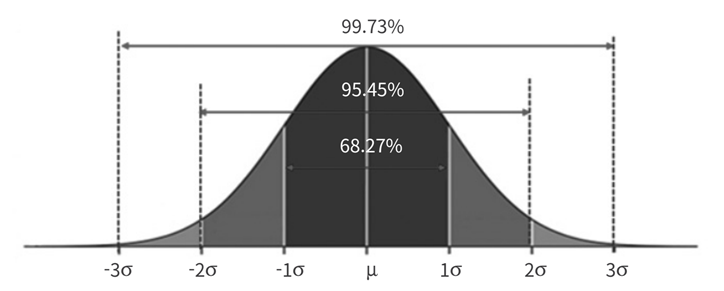
    

- GMM은 데이터를 여러 개의 가우지안 분포가 섞인 것으로 간주하고, 섞인 데이터 분포에서 개별 유형의 가우지안 분포를 추출함

### 예. 세 개의 가우지안 분포 A,B,C를 가진 데이터 세트가 있다고 가정

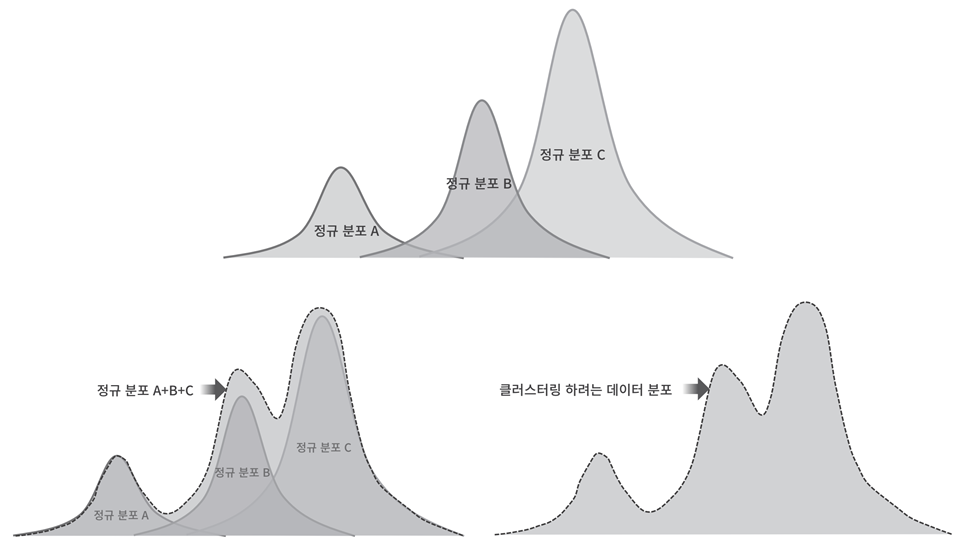

- GMM는 아래 왼쪽 그림과 같은 데이터 세트에서 오른쪽 그림과 같이 여러 개의 정규분포 곡선을 추출하고 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식
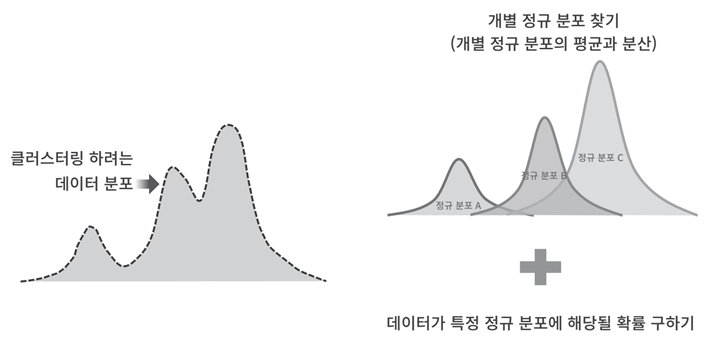

### GMM의 모수 추정

- 개별 정규분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률
    
### GMM의 모수 추정 방법
- EM(Expectation and Maximization) 방법을 적용하여 모수 추정을 함

- 사이킷런은 GMM의  EM 방식을 통한 모수 추정을 위해 **`GaussianMixture`** 클래스 지원

### GMM은 확률기반 군집화이고, K-평균은 거리기반 군집화

### GaussianMixture 클래스

- `sklearn.mixture` 패키지


- 주요 파라미터
    - `n_components` : Gaussian Mixture 모델의 총 갯수
    

- `fit(피처데이터 세트), predict(피처데이터 세트)` 메서드로 군집을 결정



## GMM 을 이용한 붓꽃 데이터 셋 클러스터링

### 붓꽃 데이터 로드

In [2]:
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
ftr_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns= ftr_names)
iris_df['target'] = iris.target

### 붓꽃 데이터의 GMM 군집화
- n_components는 3으로 지정
- 군집화 결과는 irisDF의 'gmm_cluster' 필드로 추가 저장
- GMM 군집 결과와 target 값과 비교

In [4]:
from sklearn.mixture import GaussianMixture

In [15]:
gmm = GaussianMixture(n_components= 3, random_state=0)
x = iris.data
gmm.fit(x)
cluster_labels = gmm.predict(x)
labels, cnt = np.unique(cluster_labels, return_counts= True)
print(f'cluster_labels: {labels},label counts: {cnt}')

cluster_labels: [0 1 2],label counts: [50 55 45]


In [16]:
iris_df['gmm_cluster'] = cluster_labels
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [17]:
iris_df.groupby('target')['gmm_cluster'].value_counts()

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64

### K-평균 군집화 수행

In [ ]:
# init= 'k-means++', max_iter= 300, random_state= 0 

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter= 300, random_state=0)
kmeans.fit(x)
k_labels = kmeans.predict(x)

iris_df['KMeans_cluster'] = k_labels
iris_df.groupby('target')['KMeans_cluster'].value_counts()

target  KMeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64

=> 붓꽃데이터는 GMM이 KMeans보다 더 효과적으로 clustering

## GMM와 K-평균의 비교

- K-평균은 원형의 범위에서 군집화를 수행함
- 데이터 세트가 원형의 범위를 가질수록 KMeans 군집화 효율이 더욱 높아짐

### 예. make_blobs()로  cluster_std=0.5인 군집 3개를 생성

In [20]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 
### 인자로 받아 클러스터링 결과를 시각화하는 함수  

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

**길게 늘어난 타원형의 데이터 셋을 생성**

In [42]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples= 300, n_features= 2, centers= 3, cluster_std= 0.5, random_state= 0)

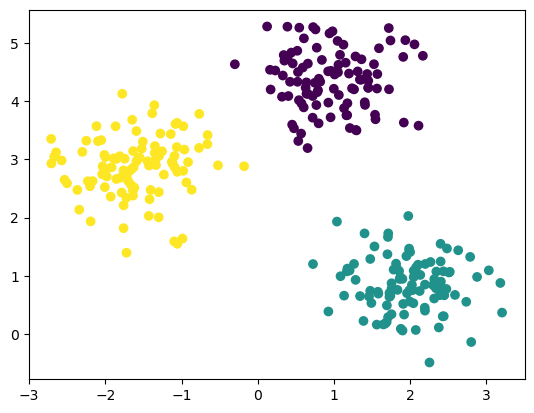

In [44]:
plt.scatter(x[:,0], x[:,1],c=y)
plt.show()

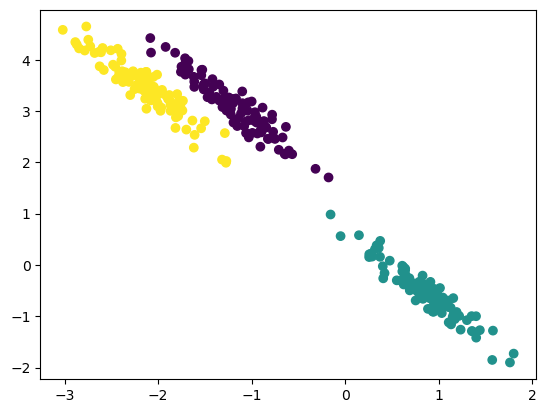

In [45]:
trans = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_ = np.dot(x, trans)
plt.scatter(x_[:,0], x_[:,1],c=y)
plt.show()

### KMeans를 적용하여 타원형 데이터셋에 대한 군집화 결과

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_)
kmeans_labels = kmeans.predict(x_)
labels, cnt = np.unique(kmeans_labels, return_counts= True)
print(f'cluster_labels: {labels},label counts: {cnt}')

cluster_labels: [0 1 2],label counts: [113 100  87]


### GMM을 적용한 군집화

In [47]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(x_)
gmm_labels = gmm.predict(x_)
labels, cnt = np.unique(gmm_labels, return_counts= True)
print(f'cluster_labels: {labels},label counts: {cnt}')

cluster_labels: [0 1 2],label counts: [100 100 100]


In [51]:
sample_df = pd.DataFrame(x_, columns=['ftr1','ftr2'])
sample_df['target'] = y
sample_df['KMeans_cluster'] = kmeans_labels
sample_df['GMM_cluster'] = gmm_labels
sample_df.head()

,ftr1,ftr2,target,KMeans_cluster,GMM_cluster
0,-1.671828,3.814284,0,0,2
1,0.945385,-0.901944,1,1,1
2,-0.959199,2.857152,0,2,2
3,-2.187799,3.569903,2,0,0
4,-1.967100,3.067528,2,0,0


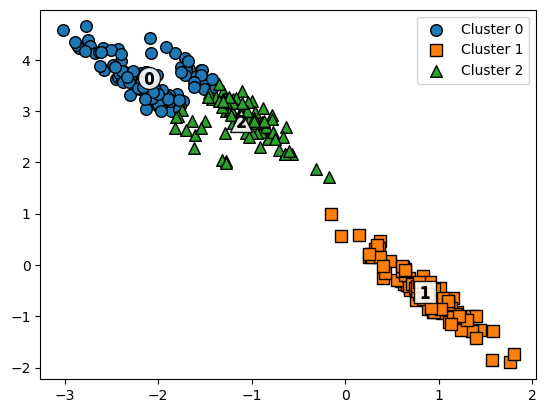

In [52]:
visualize_cluster_plot(kmeans, sample_df.iloc[:,[0,1,3]], 'KMeans_cluster', iscenter=True)

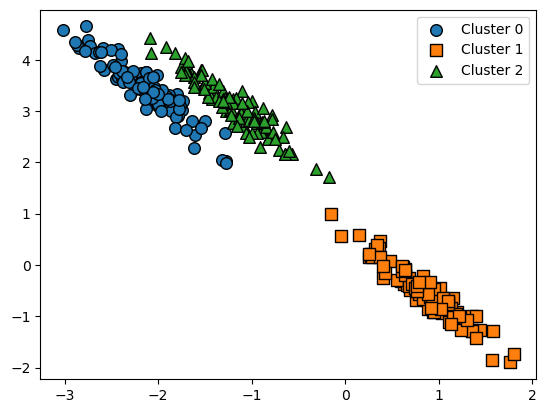

In [54]:
visualize_cluster_plot(gmm, sample_df.iloc[:,[0,1,4]], 'GMM_cluster', iscenter= False)

### K-평균과 GMM 군집화 결과 비교

In [55]:
sample_df.groupby('target')['KMeans_cluster'].value_counts()

target  KMeans_cluster
0       2                  73
        0                  27
1       1                 100
2       0                  86
        2                  14
Name: count, dtype: int64

In [56]:
sample_df.groupby('target')['GMM_cluster'].value_counts()

target  GMM_cluster
0       2              100
1       1              100
2       0              100
Name: count, dtype: int64

- 긴타원형 데이터셋에는 KMeans 보다 GMM이 군집화 정확도가 더 높은 편
- KMeans는 원형 데이터셋에 대한 군집화 성능이 더 좋은 편
- GMM:
    - 단점: 수행시간이 오래걸림
    - 장점: KMeans에 비해 더 다양한 데이터 셋에 적용성이 높음

---